# Análisis de mercado inmobiliario


## Problema

Ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

###  Pensemos 

 ¿Qué datos nos ayudarían a trabajar en el problema?¿Por qué?


**V V**

---

Debemos tener los datos existentes sobre propiedades en el mercado (datos del mercado)
La relacion entre el costo y las caracteristicas de los inmuebles
Como son:

* Cantidad de cuartos
* Ubicacion
* Tipo de propiedad
* Tamaño
* Entre otras

En base a estos datos, por medio de comparacion pueden iferirse el precio a nuevos inmuebles

---

---

In [5]:
#  Importa las librerías necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics  
from sklearn.metrics import mean_squared_error 


In [6]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


1. **Carga el dataset**

  Imprimimos la cantidad de filas y columnas, sus cinco primeras instancias.
  Para entender el contenido de los datos

In [7]:

datprop1 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DS_Proyecto_01_Datos_Properati.csv')

#print(datprop1.describe())
print(datprop1.head())
datprop1.shape

   start_date    end_date  ... property_type  operation_type
0  2019-10-17  2019-12-23  ...  Departamento           Venta
1  2019-10-17  2019-11-21  ...            PH           Venta
2  2019-10-17  2019-11-01  ...            PH           Venta
3  2019-10-17  2019-12-23  ...            PH           Venta
4  2019-10-17  2020-03-11  ...            PH           Venta

[5 rows x 19 columns]


(146660, 19)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
* El Data set tiene unos datos que (a mi criterio) no ayudaran a el entrenamiento de el programa, para la toma de decision
       - Son: Description, Operation_type, Title, Currency, Lat, Lon

In [9]:
#atprop[datprop1.currency != 'USD']
# Con esta funcion revise si habia alguna instancia diferente a USD como moneda, como no hay pude proceder a eliminarla
# De igual manera revise Operation type, todas son Venta

datprop = datprop1.copy()
#Cree una copia del Data set original para modificarlo y asi mantener el original 

datprop.drop(columns = ['description','operation_type', 'title', 'currency', 'lat', 'lon'],inplace= True)

In [10]:
print(datprop.shape)
datprop.head()

(146660, 13)


,start_date,end_date,created_on,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,2019-10-17,2019-12-23,2019-10-17,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2019-10-17,2019-11-21,2019-10-17,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2019-10-17,2019-11-01,2019-10-17,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2019-10-17,2019-12-23,2019-10-17,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,2019-10-17,2020-03-11,2019-10-17,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH


 **Importante tomar en cuenta que todos los precios estan en USD**
 
 ---

2. **Valores Faltantes**

In [11]:
 # COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
print(datprop.isna().sum())

datprop.dropna(inplace=True)
print()
print('Despues de eliminar todas las filas con espacios vacios')
print()
print(datprop.isna().sum())
datprop.shape

start_date             0
end_date               0
created_on             0
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
property_type          0
dtype: int64

Despues de eliminar todas las filas con espacios vacios

start_date         0
end_date           0
created_on         0
l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64


(122818, 13)

**Depuramos el Data set eliminando las filas que tienen espacios vacios**

---

3. **Tipos de propiedad**

Departamento       92087
Casa               16040
PH                 13923
Oficina              355
Casa de campo        253
Otro                 108
Lote                  29
Local comercial       15
Depósito               6
Cochera                2
Name: property_type, dtype: int64


<function matplotlib.pyplot.show>

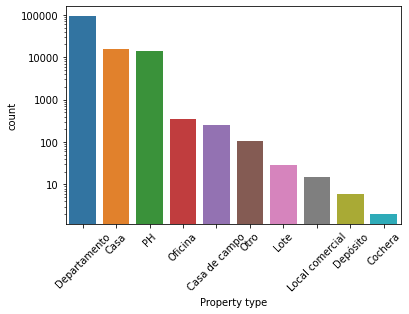

In [12]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO

#datprop.columns

print(datprop['property_type'].value_counts())
#print('aun no')

sns.countplot(data = datprop, x = 'property_type', order = datprop['property_type'].value_counts().index)
#sns.pairplot(datprop, hue = 'property_type')
plt.xlabel("Property type")
#plt.label()
plt.xticks(rotation = 45)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.show

#sns.catplot(data = datprop, x = datprop['property_type'].value_counts(), y= 'property_type')
 #           #, y =datprop['property_type'].value_counts())
#plt.xlabel("Property type")
#plt.xticks(rotation = 45)
#plt.show
#print('listo')

   ***Como podemos ver en la grafica y por el conteo, los 3 tipos de propiedades que tienen mayor cantidad de muestras son:***
   
   * Departamento (75%)
   * Casa (13%)
   * PH (11%)
   
   ----

4. **Regiones de las publicaciones**

<function matplotlib.pyplot.show>

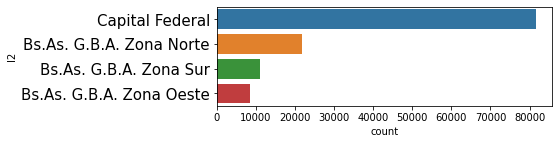

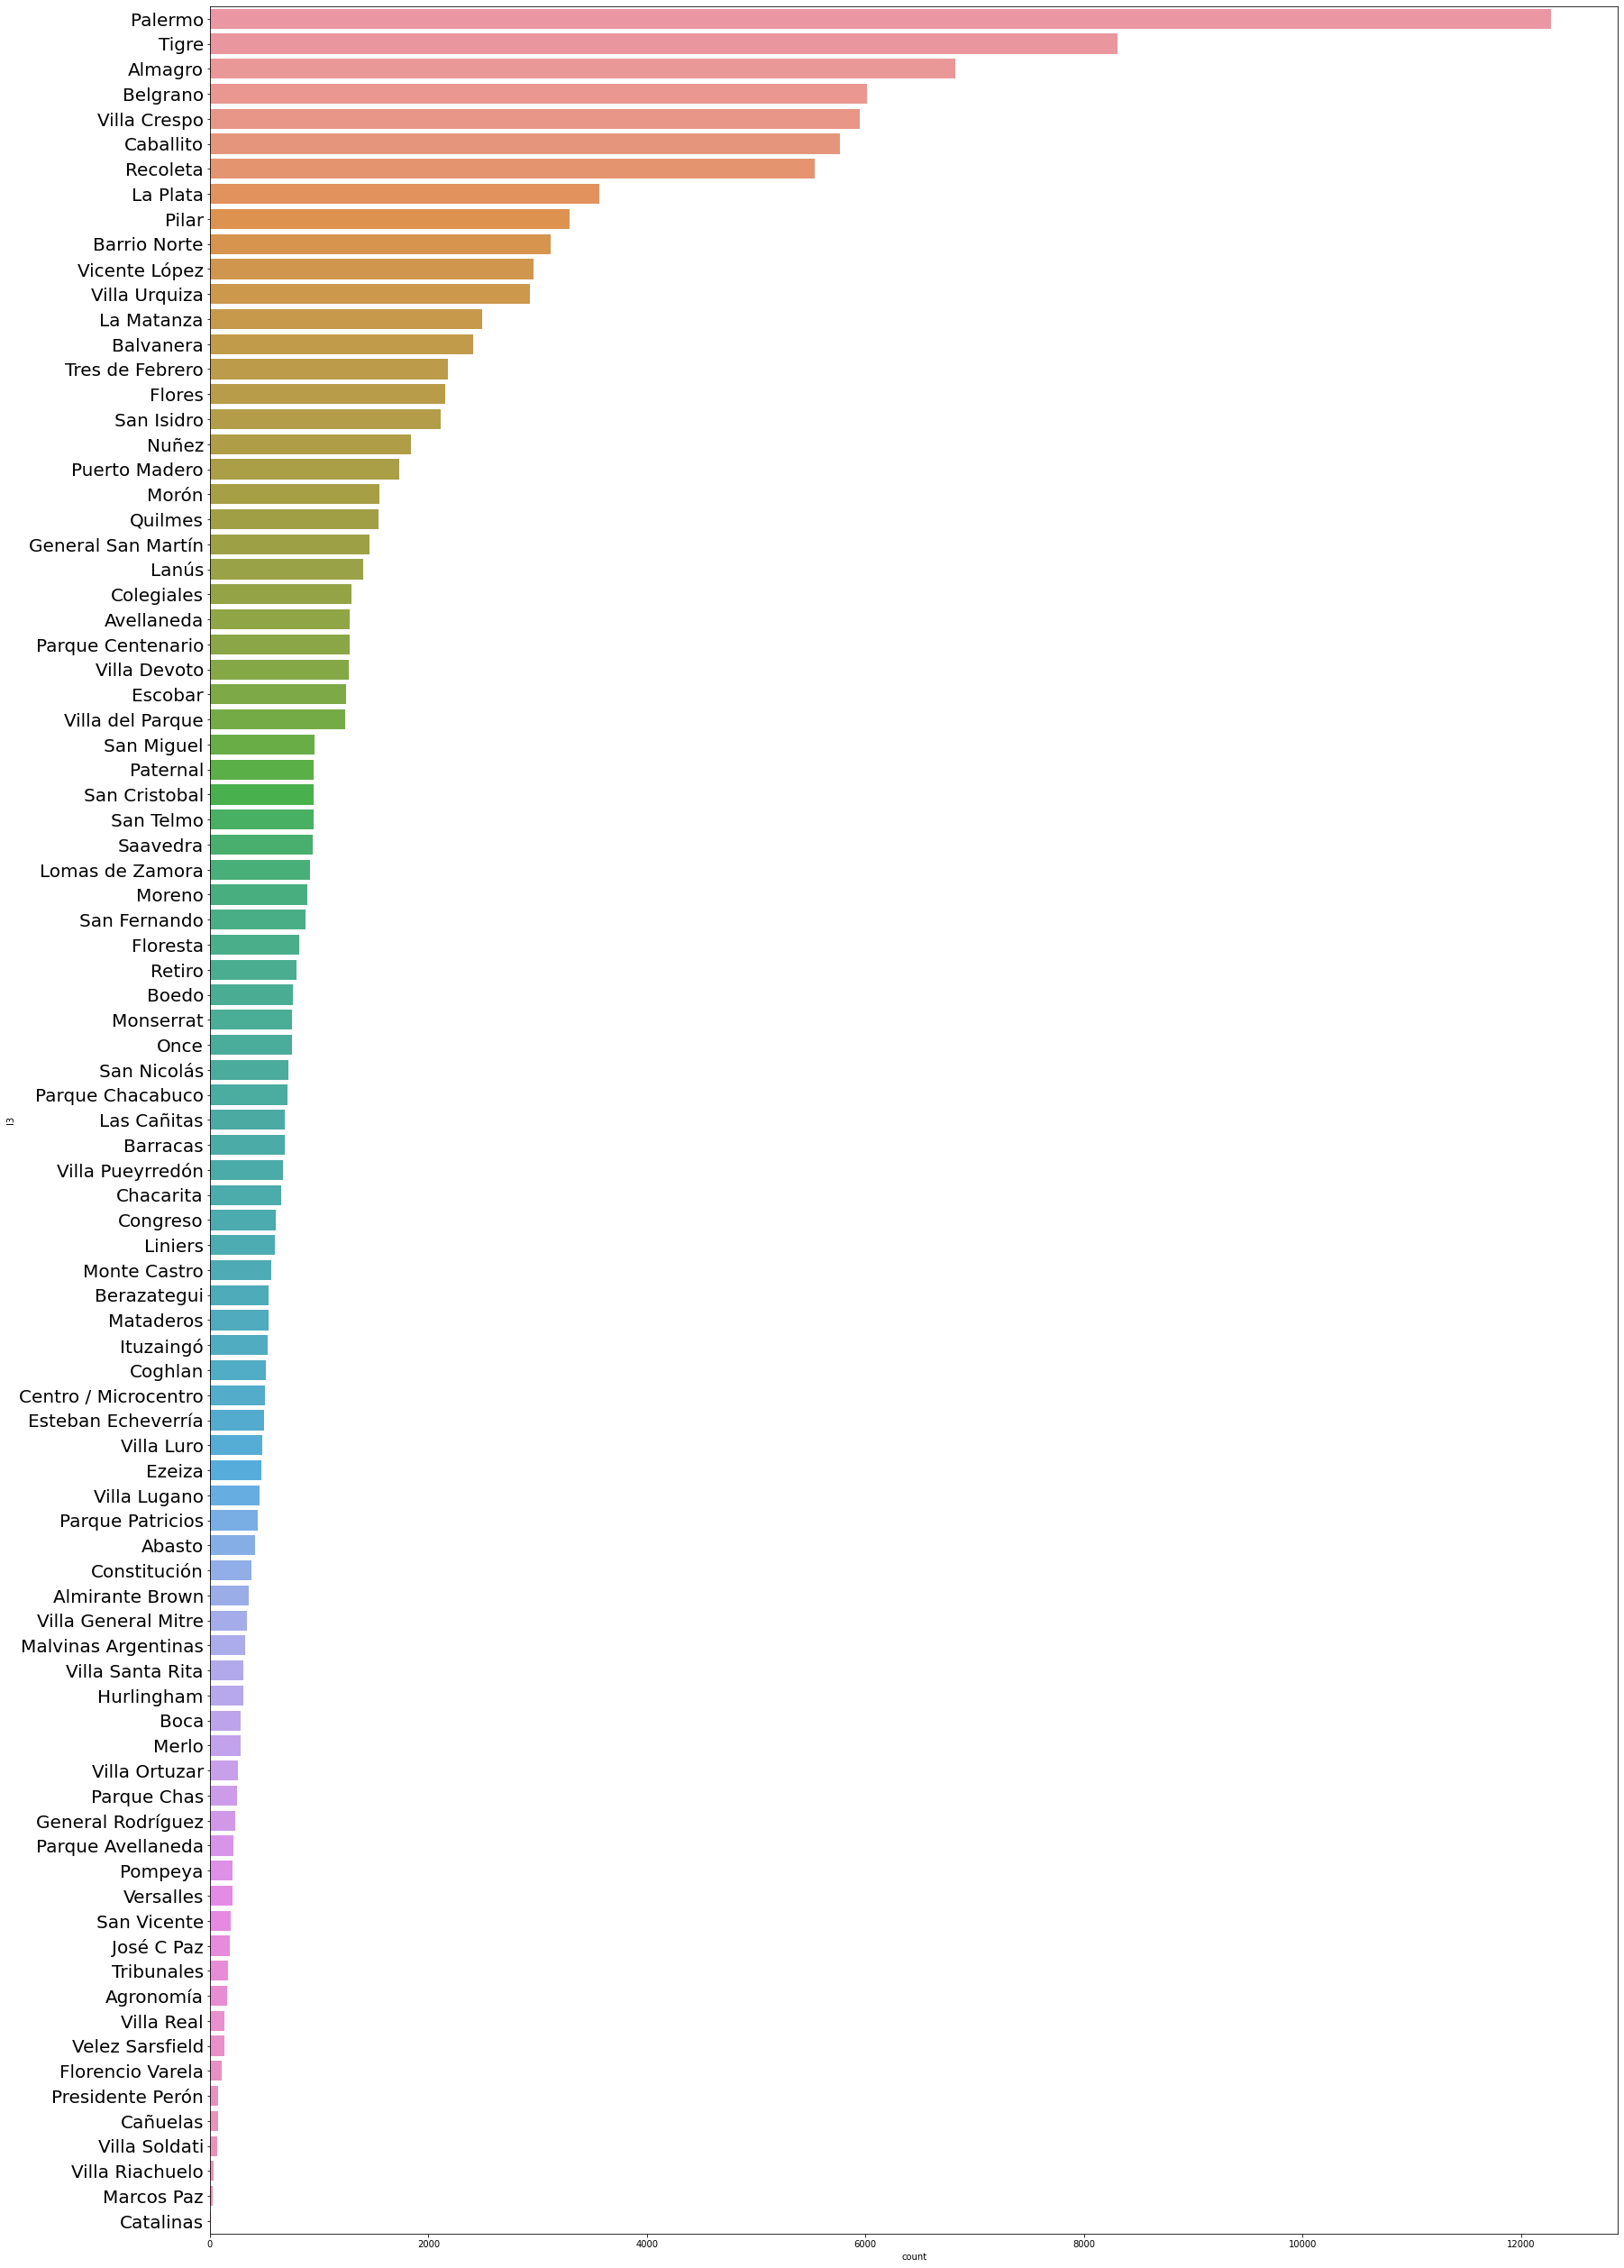

In [13]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
plt.subplot(2,1,1)
sns.countplot(data = datprop, y = "l2", order = datprop['l2'].value_counts().index)
plt.yticks(fontsize=15)
plt.figure(figsize=(28, 100))
plt.subplot(2,1,2)
sns.countplot(data = datprop, y = 'l3',order = datprop['l3'].value_counts().index,)
plt.yticks(fontsize=20)
plt.show
#plt.xticks(rotation = 90)
#plt.yticks(rotation = 0)


  **Como podemos ver en la grafica la mayoria de las entradas estan en Capital Federal**
  **A su vez los barrios que tienen mayor cantidad de muestras son:**
   * Palermo
   * Tigre
   * Almagro
   * Belgrano
   * Villa Crespo
   * Caballito
   * Recoleta
   
   ---

5. **Filtrando el Dataset:**
  
    Tomando los datos mas significativos para el area que trabajaremos
       En Capital Federal los 3 tipos de inmueble con mayores entradas
       
       

In [14]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
datfilt = datprop.copy()
datfilt = datfilt[((datfilt.property_type == 'Departamento')|(datfilt.property_type == 'Casa')|(datfilt.property_type == 'PH')) & (datfilt.l2 == 'Capital Federal')]
datfilt

,start_date,end_date,created_on,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,2019-10-17,2019-12-23,2019-10-17,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2019-10-17,2019-11-21,2019-10-17,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2019-10-17,2019-11-01,2019-10-17,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2019-10-17,2019-12-23,2019-10-17,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2019-10-17,2019-11-01,2019-10-17,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146554,2019-07-31,2019-08-14,2019-07-31,Argentina,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,2019-07-31,2019-08-14,2019-07-31,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,2019-07-31,2020-01-17,2019-07-31,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,2019-07-31,2019-08-23,2019-07-31,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


---

**Podemos Notar que el data set tiene menos instancias de las esperadas para el Checkpoint es debido a que elimine las filas con datos vacios y las columnas que no se iban a utilizar**

---

Modificare el Data set original para tener los datos como lo piden en el ejercicio

-----

In [15]:
datfilt = datprop1.copy()
datfilt = datfilt[((datfilt.property_type == 'Departamento')|(datfilt.property_type == 'Casa')|(datfilt.property_type == 'PH')) & (datfilt.l2 == 'Capital Federal')]
datfilt

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146554,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,USD,Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa...,Espectacular Ph 4 Ambientes de excelente calid...,PH,Venta
146555,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,USD,PH Reciclado a nuevo en pleno Palermo Hollywood!,Espectacular Ph 3 Ambientes de excelente calid...,PH,Venta
146556,2019-07-31,2020-01-17,2019-07-31,-34.584134,-58.436389,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,USD,Hermoso PH reciclado - 4 ambientes + Pileta + ...,"Hermoso PH reciclado en Palermo, 143 m2 cubier...",PH,Venta
146557,2019-07-31,2019-08-23,2019-07-31,-34.583995,-58.417645,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,USD,Venta. Departamento. 3 Ambientes. 145m². Ampli...,CARACTERÍSTICAS- Ambientes: 3.- Superficie tot...,Departamento,Venta


----

**Aqui tenemos el data set como lo piden en el Checkpoint**

----

----





**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

-----


-----

 **Creamos un nuevo Data Set en el que, por medio de masking, tomamos solo los siguientes datos:**
 * Rooms
 * Bedrooms
 * Bathrooms
 * Total Surface
 * Covered surface
 * Price
 * Property Type

In [16]:
mask = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price','property_type']

datfilt2 = datfilt[mask].copy()

datfilt2.describe()


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


**Estudio de los valores**

    Podemos ver que la desviacion estandar por la superficie total, la superficie cubierta y el precio es muy alta
        Con esto podemos inferir que tiene mucha dispersion en los datos
        
----

In [17]:
datfilt2.columns

Index(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'property_type'],
      dtype='object')

--------

**Realiza graficas para ver la dispersion**



Comparacion de las muestras, comparando las diferentes caracteristicas que tienen las muestras
Aqui podemos ver graficante lo antes visto con los datos estadisticos,
 Desviacion estandar para Covered Surface, Total Surface and Price es muy amplia
Po lo tanto la muestra esta muy regada


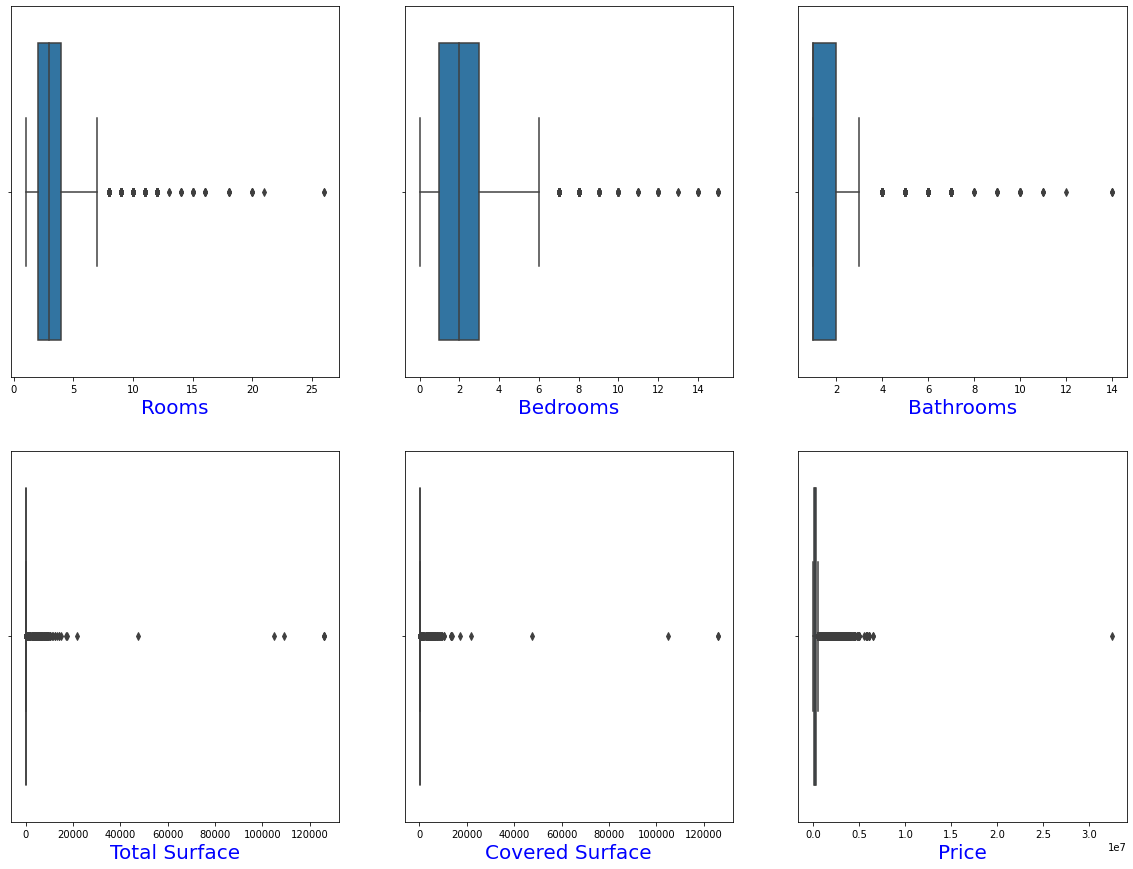

In [18]:
print('Comparacion de las muestras, comparando las diferentes caracteristicas que tienen las muestras', )
plt.figure(figsize=(20, 15))

plt.subplot(2,3,1)
sns.boxplot(x= (datfilt2['rooms'] ))#<=20000))
plt.xlabel('Rooms', fontsize = 20, color = 'blue')

#plt.xlim(0,500)
#plt.show
plt.subplot(2,3,2)
sns.boxplot(x= (datfilt2['bedrooms'] ))
plt.xlabel('Bedrooms', fontsize = 20, color = 'blue')

#plt.show
plt.subplot(2,3,3)
sns.boxplot(x= (datfilt2['bathrooms'] ))
plt.xlabel('Bathrooms', fontsize = 20, color = 'blue')

plt.subplot(2,3,4)
sns.boxplot(x= (datfilt2['surface_total'] ))
plt.xlabel('Total Surface', fontsize = 20, color = 'blue')

plt.subplot(2,3,5)
sns.boxplot(x= (datfilt2['surface_covered'] ))
plt.xlabel('Covered Surface', fontsize = 20, color = 'blue')

plt.subplot(2,3,6)
sns.boxplot(x= (datfilt2['price'] ))
plt.xlabel('Price', fontsize = 20, color = 'blue')

print('Aqui podemos ver graficante lo antes visto con los datos estadisticos,\n Desviacion estandar para Covered Surface, Total Surface and Price es muy amplia\nPo lo tanto la muestra esta muy regada')


#


Aqui podemos ver graficante lo antes visto con los datos estadisticos
Desviacion estandar para Covered Surface, Total Surface and Price es muy alta

Po lo tanto la muestra tiene valores con mucha diferencia


----


In [19]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO


----

**Filtramos los datos para eliminar esta dispersion tan alta**

----

In [20]:
q3 = datfilt2.surface_total.quantile(0.9)
q1 = datfilt2.surface_total.quantile(0.1)
iqr = q3 - q1
#print(q1 - (1.5 * iqr))
datfilt2 = datfilt2[((datfilt2.surface_total > (q1 - (1.5 * iqr))) & (datfilt2.surface_total < (q3 + (1.5 * iqr))))]
datfilt2


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


In [21]:
Q3 = datfilt2.price.quantile(0.9)
Q1 = datfilt2.price.quantile(0.1)
iqr = Q3 - Q1
#print(Q1 - (1.5 * iqr))
datfilt2 = datfilt2[((datfilt2.price > (Q1 - (1.5 * iqr))) & (datfilt2.price < (Q3 + (1.5 * iqr))))]
datfilt2

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...
146553,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento
146554,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,4.0,2.0,2.0,317.0,143.0,530000.0,PH


In [22]:
datfilt2 = datfilt2[(datfilt2.surface_total >= datfilt2.surface_covered)]
datfilt2

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...
146553,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento
146554,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,4.0,2.0,2.0,317.0,143.0,530000.0,PH


In [23]:
datfilt2.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,78201.000000,78201.000000,77384.000000,78201.000000,78201.000000,78201.000000
mean,2.922750,1.940052,1.483175,86.182824,74.780143,221583.732778
std,1.197548,0.988586,0.747326,55.622098,45.215859,150880.732996
min,1.000000,0.000000,1.000000,12.000000,1.000000,6000.000000
25%,2.000000,1.000000,1.000000,49.000000,44.000000,123000.000000
50%,3.000000,2.000000,1.000000,70.000000,61.000000,175000.000000
75%,4.000000,3.000000,2.000000,104.000000,90.000000,265000.000000
max,21.000000,15.000000,14.000000,391.000000,391.000000,985000.000000


Text(0.5, 0, 'Price')

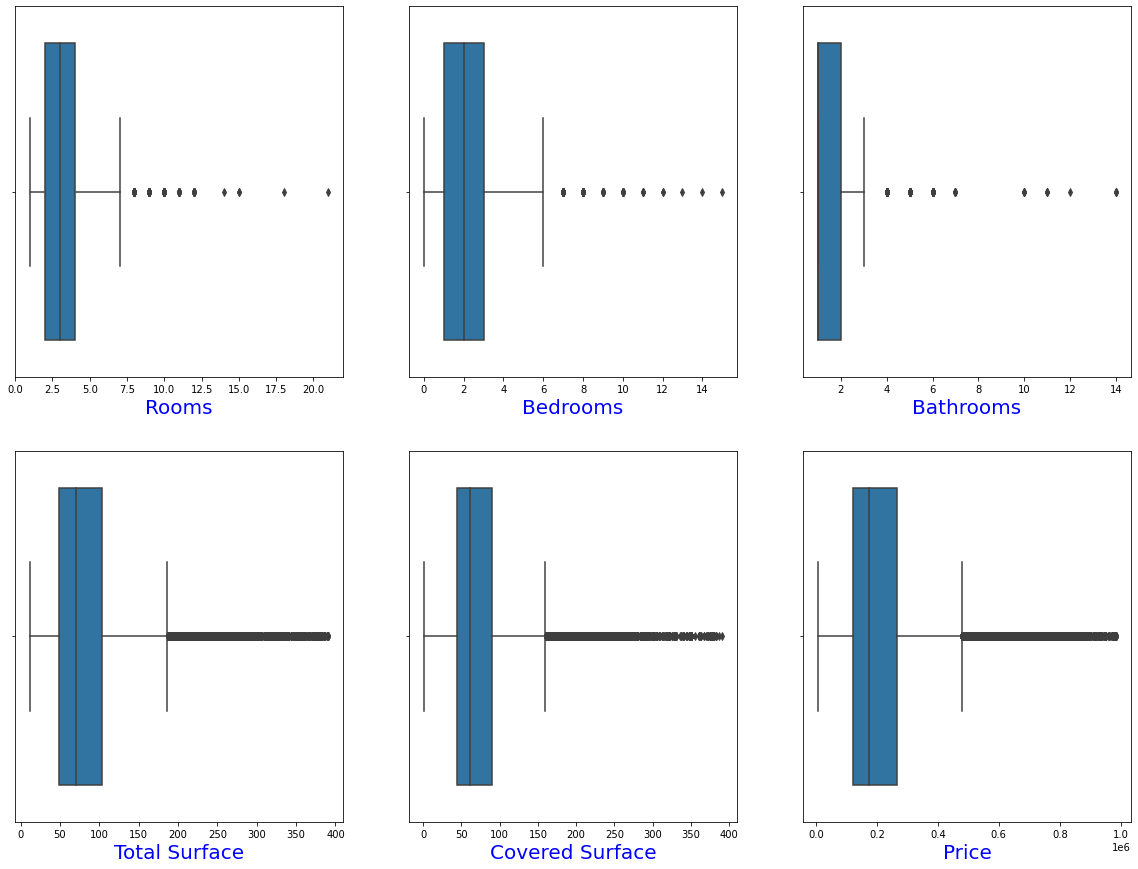

In [24]:
plt.figure(figsize=(20, 15))

plt.subplot(2,3,1)
sns.boxplot(x= (datfilt2['rooms'] ))#<=20000))
plt.xlabel('Rooms', fontsize = 20, color = 'blue')

#plt.xlim(0,500)
#plt.show
plt.subplot(2,3,2)
sns.boxplot(x= (datfilt2['bedrooms'] ))
plt.xlabel('Bedrooms', fontsize = 20, color = 'blue')

#plt.show
plt.subplot(2,3,3)
sns.boxplot(x= (datfilt2['bathrooms'] ))
plt.xlabel('Bathrooms', fontsize = 20, color = 'blue')

plt.subplot(2,3,4)
sns.boxplot(x= (datfilt2['surface_total'] ))
plt.xlabel('Total Surface', fontsize = 20, color = 'blue')

plt.subplot(2,3,5)
sns.boxplot(x= (datfilt2.surface_covered ))
plt.xlabel('Covered Surface', fontsize = 20, color = 'blue')

plt.subplot(2,3,6)
sns.boxplot(x= (datfilt2['price'] ))
plt.xlabel('Price', fontsize = 20, color = 'blue')

----
**Podemos ver con los graficos que la limpieza de outliers funciono y la muestra ya no esta tan dispersada**

----

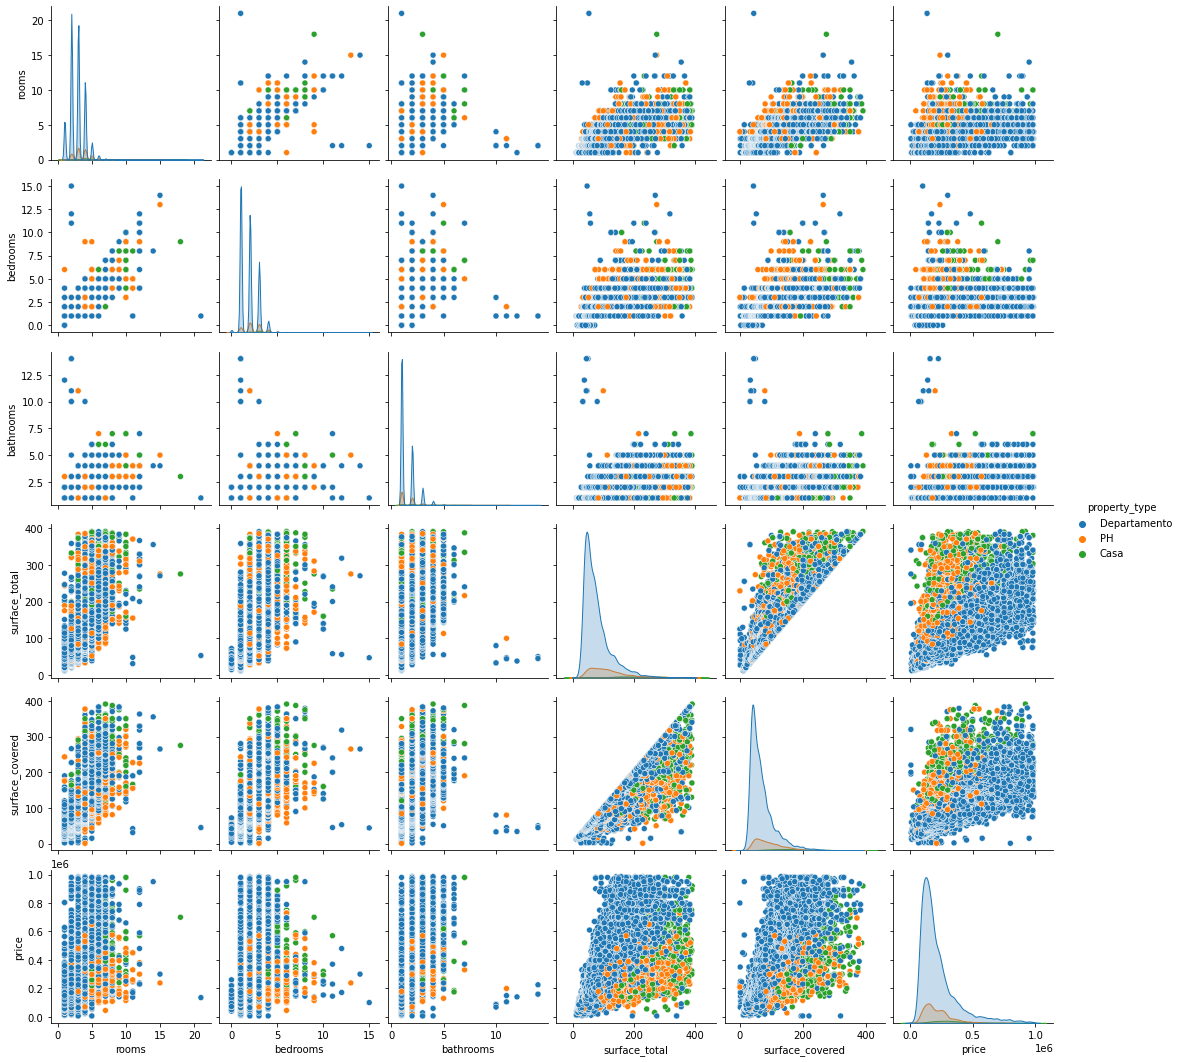

In [25]:
sns.pairplot(datfilt2, hue = 'property_type')

In [26]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
Desafio = datfilt.copy()
Desafio.head()
Desafio['Pricemtr2'] = (Desafio.price / Desafio.surface_total)
Desafio.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,Pricemtr2
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,1092.857143
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,2271.428571
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,2777.777778
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,3470.588235
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta,2678.571429


In [27]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
Desafio.drop(columns = ['start_date', 'end_date', 'created_on', 'description','operation_type', 'title', 'currency', 'lat', 'lon', 'l1'],inplace= True)
Desafio.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,Pricemtr2
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento,1092.857143
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,2271.428571
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,2777.777778
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,3470.588235
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,2678.571429


In [28]:
D1 = Desafio.groupby(['l3']).mean('Pricemtr2').reset_index().sort_values('Pricemtr2', ascending=False)#.reset_index      
D1.drop(columns = ['rooms','bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price'],inplace= True)
D1


,l3,Pricemtr2
34,Puerto Madero,6092.910428
19,Las Cañitas,3845.658070
26,Palermo,3529.403453
6,Belgrano,3366.156015
35,Recoleta,3351.219994
24,Nuñez,3247.169099
5,Barrio Norte,3102.985101
36,Retiro,2956.866711
55,Villa Urquiza,2746.138896
13,Coghlan,2742.628357


Aca tenemos los precios promedio por metros cuadrado de los barrios

<function matplotlib.pyplot.show>

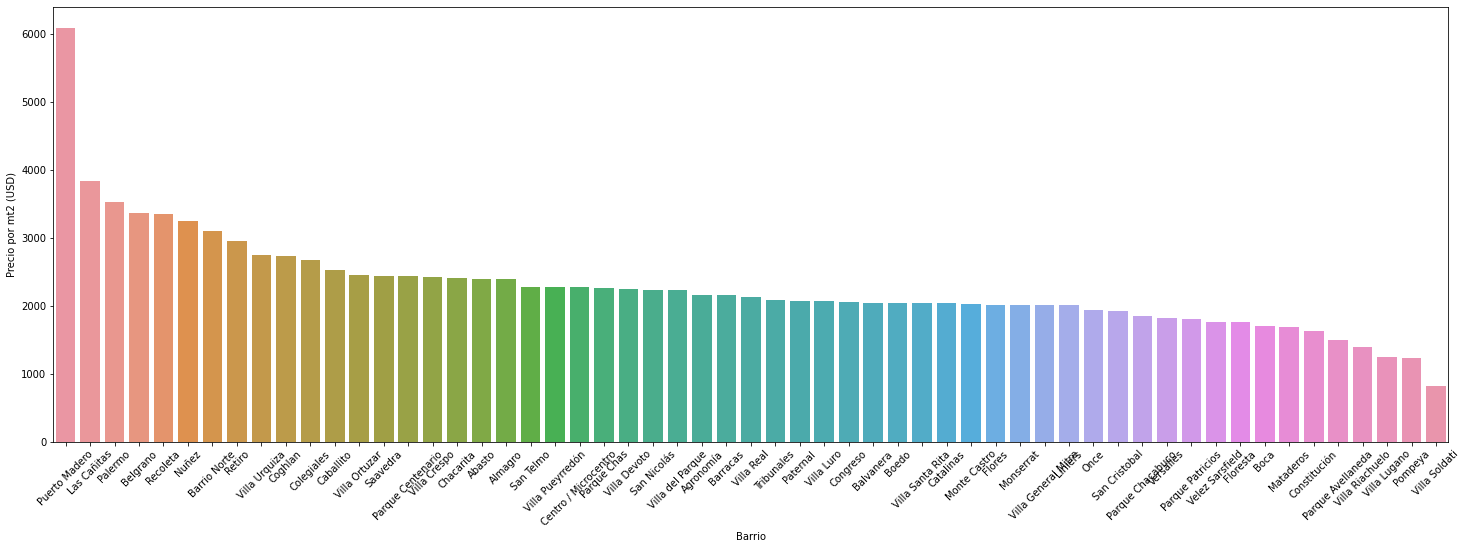

In [29]:
plt.figure(figsize = (25,8))
sns.barplot(data = D1, x = 'l3', y = 'Pricemtr2')  # order = datprop['property_type'].value_counts().index)
  #sns.pairplot(datprop, hue = 'property_type')
plt.xlabel("Barrio")
plt.ylabel("Precio por mt2 (USD)")
  #plt.label()
plt.xticks(rotation = 45)
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.show

Podemos ver representado en la grafica una comparacion entre el precio del metro cuadrados de la superficie por Barrio

## 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

---

In [30]:
dfML = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS_Proyecto_01_Datos_Properati.csv')
dfML = dfML[(dfML.property_type == "Departamento") | (dfML.property_type == "PH") | (dfML.property_type == "Casa")]
dfML = dfML[dfML.l2 == "Capital Federal"]
dfML.columns.values


array(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2',
       'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'currency', 'title', 'description',
       'property_type', 'operation_type'], dtype=object)

In [31]:
dfML = dfML[(dfML.surface_total >= 15) & (dfML.surface_total <= 1000)]
dfML = dfML[dfML.price <= 4000000]
xtr = ["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]
dfML1 =dfML[xtr]
dfML1 = dfML1.dropna()
dfML1.shape

(81019, 6)

In [32]:
dfML1.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


In [33]:
dfML1.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81019.000000,81019.000000,81019.000000,81019.000000,81019.000000,8.101900e+04
mean,3.009652,2.002037,1.553821,95.361779,84.928535,2.637725e+05
std,1.308602,1.049673,0.852672,77.253578,156.133119,2.989499e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.800000e+05
max,26.000000,15.000000,14.000000,1000.000000,17220.000000,4.000000e+06


Tenemos dataset con 81019 instacias y 6 columnas.
___________________________________________________

# *Modelo benchmark*

> Bloque con sangría Usaremos un arbol de decision basico, con profundidad de 8, las variables independientes que usaremos son: Superficie total y Superficie cubierta (estas fueron las que mostraron los valores mas altos de correlacion con la variable precio)




In [36]:
X_b = dfML1[["surface_total", "surface_covered"]]
y_b = dfML1["price"]

X_train, X_test, y_train, y_test = train_test_split(X_b, y_b, test_size = 0.3, random_state = 42)

tree_b = DecisionTreeRegressor(max_depth = 8)
tree_b.fit(X_train, y_train)
y_test_pred = tree_b.predict(X_test)
y_train_pred = tree_b.predict(X_train)

In [39]:
RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))


print('Evaluación Modelo Benchmark')
print()
print("El RMSE en train es:",RMSE_train)
print("El RMSE en test es:",RMSE_test)
print('')


Evaluación Modelo Benchmark

El RMSE en train es: 165084.40201364335
El RMSE en test es: 175071.40448797768



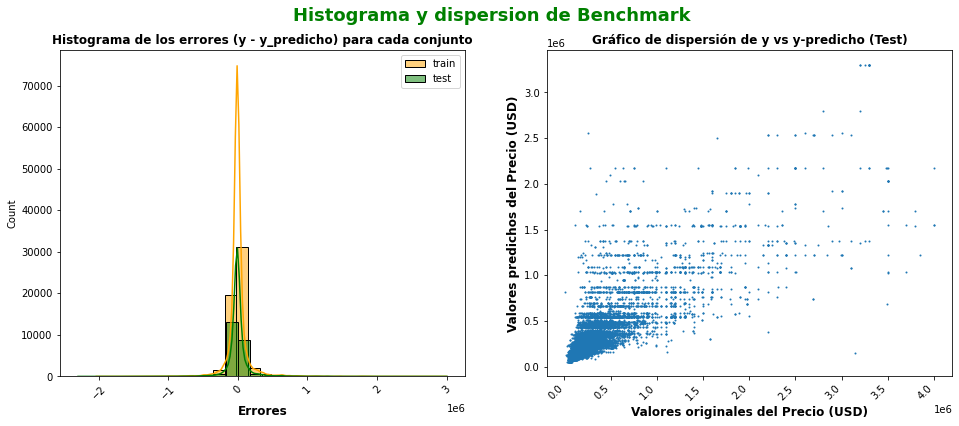

In [42]:
plt.figure(figsize = (16,6))
plt.suptitle('Histograma y dispersion de Benchmark', fontsize = 18, color = "green",  fontweight = "black")
print('')
plt.subplot(1,2,1)
plt.title('Histograma de los errores (y - y_predicho) para cada conjunto', fontsize = 12,  fontweight = "black")
sns.histplot(y_train - y_train_pred, bins = 30, label = 'train', color = 'orange', kde=True)
sns.histplot(y_test - y_test_pred, bins = 30, label = 'test', color = 'green', kde=True)
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(1,2,2)
plt.title('Gráfico de dispersión de y vs y-predicho (Test)', fontsize = 12,  fontweight = "black")
plt.scatter(y_test, y_test_pred, s=1) 
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("Valores originales del Precio (USD)", fontweight = "black", fontsize = 12)
plt.ylabel("Valores predichos del Precio (USD)", fontweight = "black", fontsize = 12);

--------------------------------------


**Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.**



---------------------------------

In [44]:
X = dfML1[["rooms","surface_covered","surface_total","bedrooms","bathrooms"]]
y = dfML1["price"]

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 5) (56713,) (24306, 5) (24306,)


Definimos una funcion para evaluar el desempeno del modelo 

In [50]:
def Eval_mod(X_train, X_test, y_train, y_test, modelo):
    
    modelo.fit(X_train, y_train)
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (15,6))
    plt.suptitle("Histograma de los errores (y - y_predicho) y Gráfico de dispersión de 'y' vs 'y-predicho' ", fontsize = 18, color = "green")

    plt.subplot(1,2,1)
    plt.title('Histograma de los errores (y - y_predicho) para cada conjunto', fontsize = 12,  fontweight = "black")
    sns.histplot(y_train - y_train_pred, bins = 30, label = 'train', color = 'orange', kde=True)
    sns.histplot(y_test - y_test_pred, bins = 30, label = 'test', color = 'green', kde=True)
    plt.xlabel("Errores", fontweight = "black", fontsize = 12)
    plt.xticks(rotation = 45)
    plt.legend()

    plt.subplot(1,2,2)
    plt.title('Gráfico de dispersión de y vs y-predicho (Test)', fontsize = 12,  fontweight = "black")
    plt.scatter(y_test, y_test_pred, s=1) 
    plt.xticks(rotation = 45, horizontalalignment="right")
    plt.xlabel("Valores originales del Precio (USD)", fontweight = "black", fontsize = 12)
    plt.ylabel("Valores predichos del Precio (USD)", fontweight = "black", fontsize = 12);  

--------
# **Arbol de decision**

Utilizaremos la misma profunda del Benchmark 


Raíz del error cuadrático medio en Train: 139064.9573938412
Raíz del error cuadrático medio en Test: 158492.1891067661


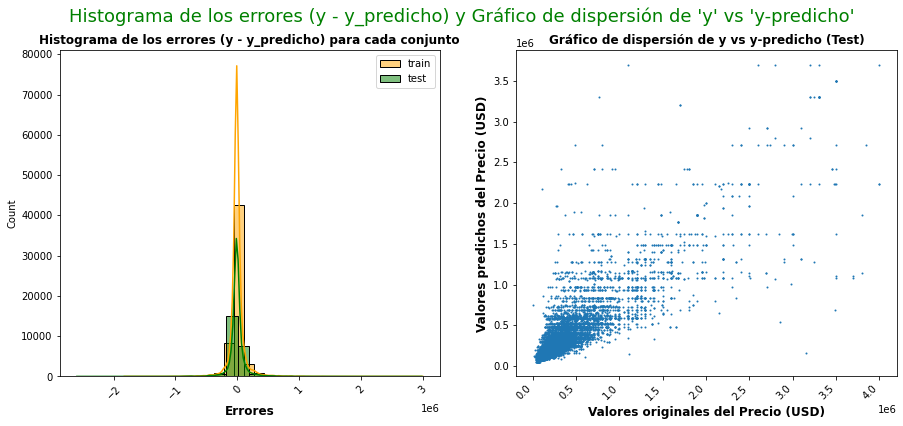

In [51]:
tree_model = DecisionTreeRegressor(max_depth = 8)
Eval_mod(X_train, X_test, y_train, y_test, tree_model)


Podemos ver una mejora en el RMSE paso de **175071.4** a **158492.1**

El valor sigue siendo alto





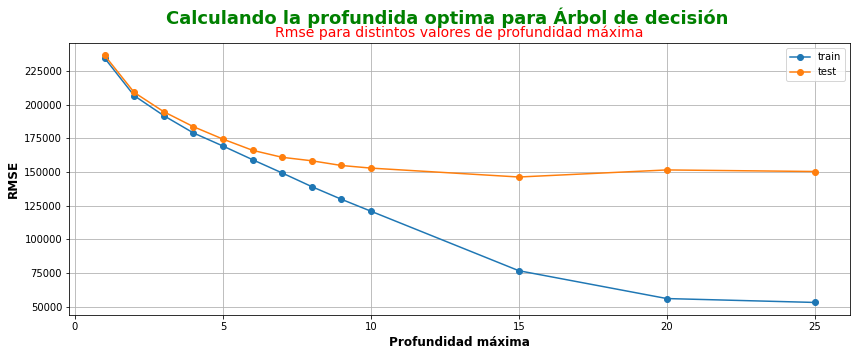

In [54]:
lista_r2_train = []
lista_r2_test = []

lista_rmse_train = []
lista_rmse_test = []

max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25]

for i in max_depths:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test) 
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
   

    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)



plt.figure(figsize = (14,5))
plt.suptitle('Calculando la profundida optima para Árbol de decisión', fontsize = 18, color = "green",  fontweight = "black")

 
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 14, color = "r")


plt.show()

**Seleccionamos el la profundidad de 10**

Raíz del error cuadrático medio en Train: 120797.5008434747
Raíz del error cuadrático medio en Test: 153023.38549275624


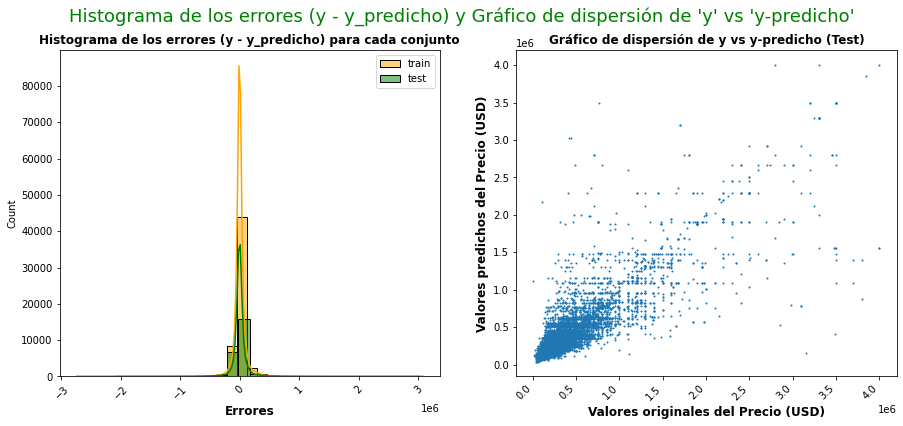

In [55]:
tree_model = DecisionTreeRegressor(max_depth = 10)
Eval_mod(X_train, X_test, y_train, y_test, tree_model)

Podemos ver una mejora en el RMSE paso de **158492.1** a **153023.3**

-Tambien una mejora en la dispersion (mayor concentracione en la diagonal)

---




--------
# **Vecinos mas cercanos**

Utilizaremos 5 vecinos



Raíz del error cuadrático medio en Train: 121055.07035092897
Raíz del error cuadrático medio en Test: 154984.54716728174


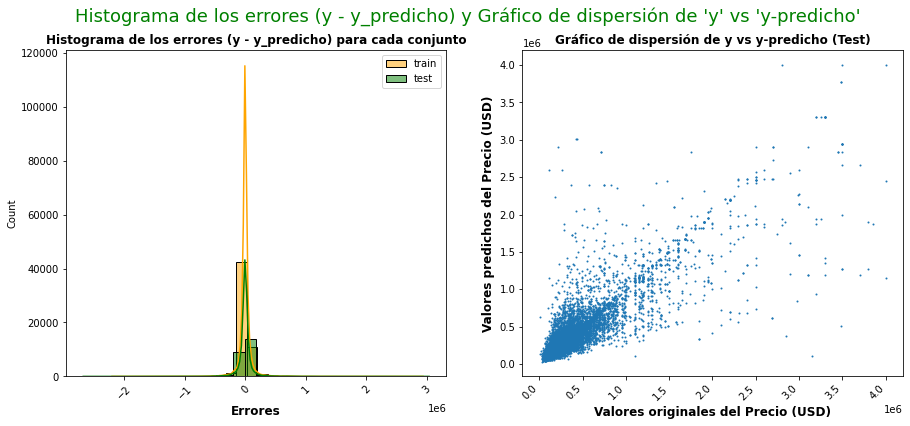

In [57]:

knn_regressor = KNeighborsRegressor(n_neighbors = 5)
Eval_mod(X_train, X_test, y_train, y_test, knn_regressor)



Obtuvimos un rendimiento similar a el de Arbol de decision pero un poco mejor

-En comparacion con benchmark el RMSE paso de **175071.4** a **154984.5**  

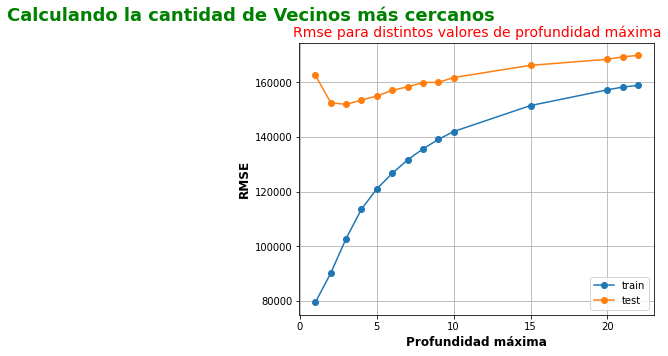

In [59]:
lista_r2_train = []
lista_r2_test = []

lista_rmse_train = [] 
lista_rmse_test = []

k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,21,22]

for k in k_vecinos:
    model = KNeighborsRegressor(n_neighbors= k)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)


plt.figure(figsize = (14,5))
plt.suptitle('Calculando la cantidad de Vecinos más cercanos', fontsize = 18, color = "green",  fontweight = "black")



plt.subplot(1,2,2)  
plt.plot(k_vecinos, lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 14, color = "r")


plt.show()

Elegimos la cantidad de vecinos 3, representa el menor RMSE del conjunto Test

Raíz del error cuadrático medio en Train: 102858.69547848027
Raíz del error cuadrático medio en Test: 151914.2213043359


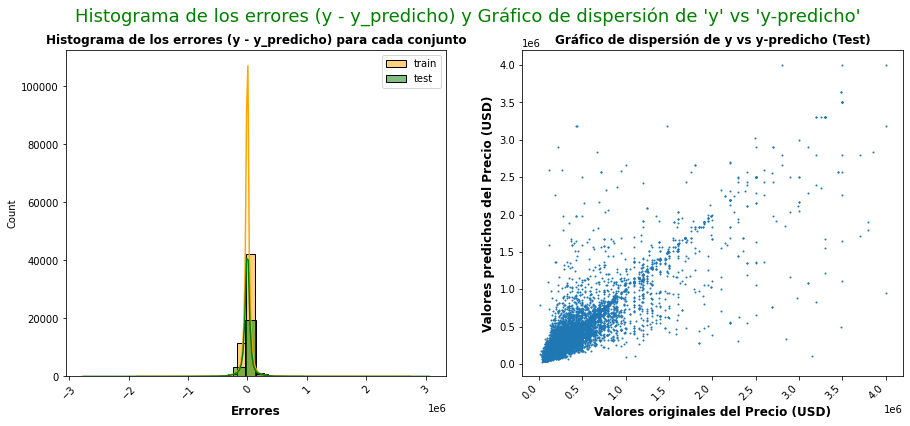

In [60]:
knn_regressor = KNeighborsRegressor(n_neighbors = 3)
Eval_mod(X_train, X_test, y_train, y_test, knn_regressor)


De los modelos entrenados, ambos presentan comportamientos similares. Sin embargo elegiría quedarme con el modelo de árbol de decisión (con una profundidad = 10), ya que a mostró un mejor comportamiento en las graficas Train vs Test.

-----------------

Evaluemos la importancia de cada variable en el modelo de Arbol de decision seleccionado

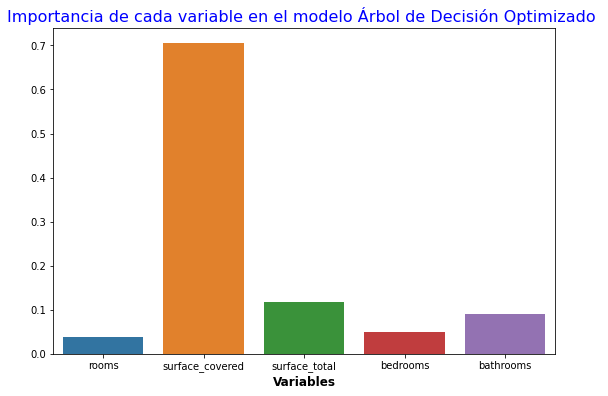

In [63]:
importances_tree = tree_model.feature_importances_
columns = X.columns

plt.figure(figsize = (9, 6))
sns.barplot(x = columns, y = importances_tree) 
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo Árbol de Decisión Optimizado ", fontsize = 16, color = "blue")
plt.show()

Podemos ver que la superficie cubierta es la mas importante para la toma de decisiones

-----

# Probemos agregando dos variable mas, con Latitud y Longitud

In [75]:
ab=["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", 'lat', 'lon', "price"]
dfML2 =dfML[ab]
dfML2 = dfML2.dropna()
dfML2.shape

(76771, 8)

In [76]:
X = dfML2[["rooms","surface_covered","surface_total","bedrooms",'bathrooms', 'lat', 'lon']]
y = dfML2["price"]

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(53739, 7) (53739,) (23032, 7) (23032,)


Raíz del error cuadrático medio en Train: 80994.07241928209
Raíz del error cuadrático medio en Test: 97419.19578360287


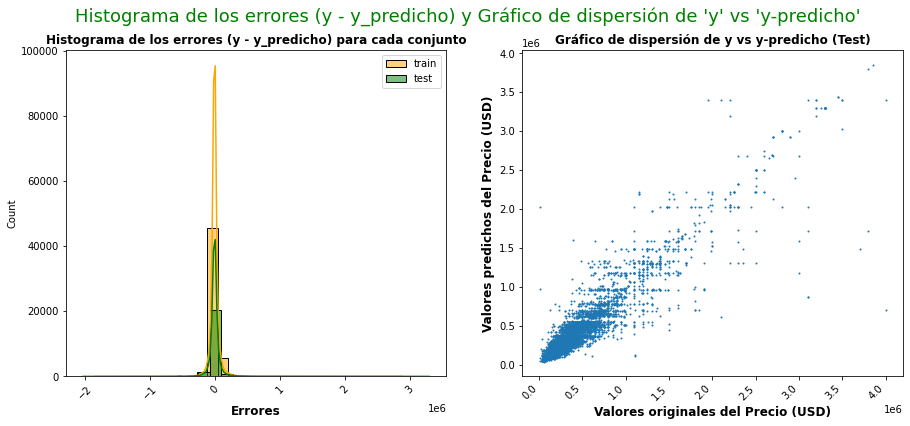

In [80]:
tree_model2 = DecisionTreeRegressor(max_depth = 10)
Eval_mod(X_train, X_test, y_train, y_test, tree_model2)

Raíz del error cuadrático medio en Train: 94074.69543184775
Raíz del error cuadrático medio en Test: 132676.12832485593


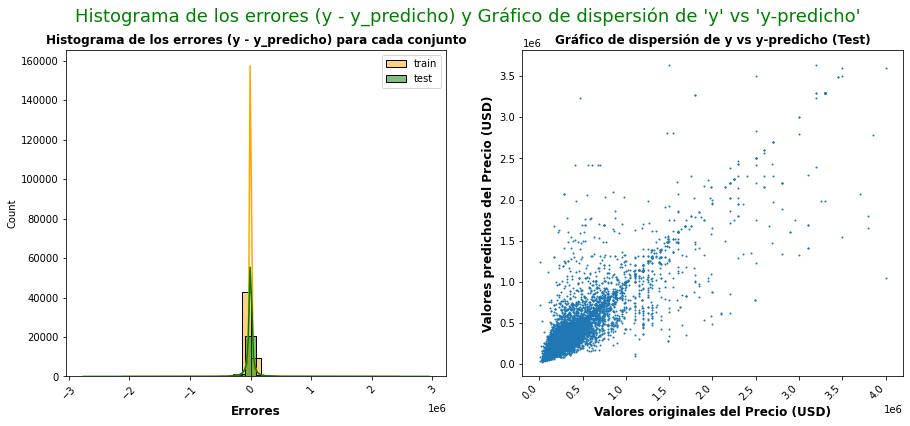

In [81]:
knn_regressor2 = KNeighborsRegressor(n_neighbors = 3)
Eval_mod(X_train, X_test, y_train, y_test, knn_regressor2)

**Podemos ver que el RMSE mejoro**

-En el arbol de decision paso de **153023.3** a **97419.2**

-En los vecinos cercanos paso de **151914.2** a **132676.1**
__________________________________________
Pasamos a hacer la optimizacion (buscando los mejores hiperparametros)

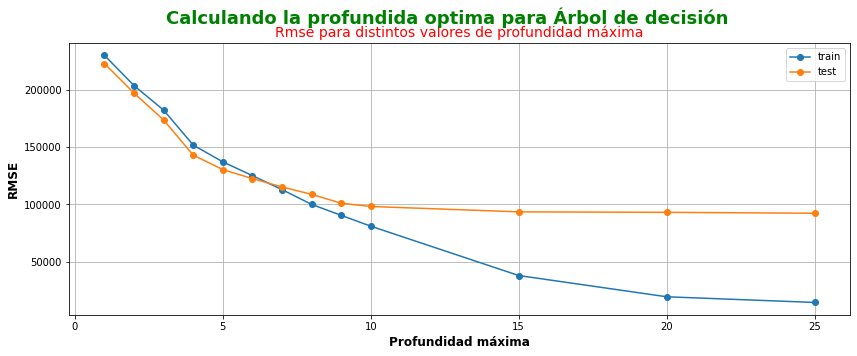

In [82]:
lista_r2_train = []
lista_r2_test = []

lista_rmse_train = []
lista_rmse_test = []

max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25]

for i in max_depths:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test) 
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
   

    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)



plt.figure(figsize = (14,5))
plt.suptitle('Calculando la profundida optima para Árbol de decisión', fontsize = 18, color = "green",  fontweight = "black")

 
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 14, color = "r")


plt.show()

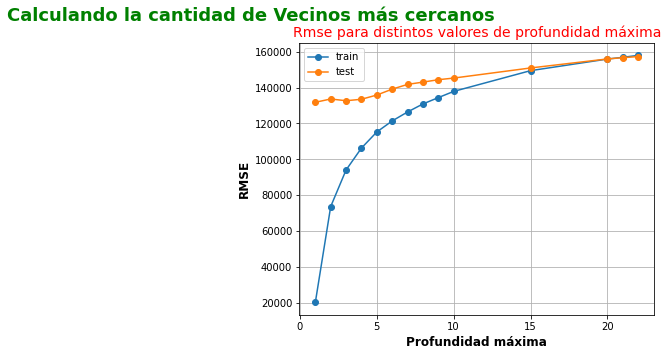

In [83]:
lista_r2_train = []
lista_r2_test = []

lista_rmse_train = [] 
lista_rmse_test = []

k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,21,22]

for k in k_vecinos:
    model = KNeighborsRegressor(n_neighbors= k)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)


plt.figure(figsize = (14,5))
plt.suptitle('Calculando la cantidad de Vecinos más cercanos', fontsize = 18, color = "green",  fontweight = "black")



plt.subplot(1,2,2)  
plt.plot(k_vecinos, lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 14, color = "r")


plt.show()

**Vemos que se mantienen los hiperparametros con la latitud y la Longitud**
________________

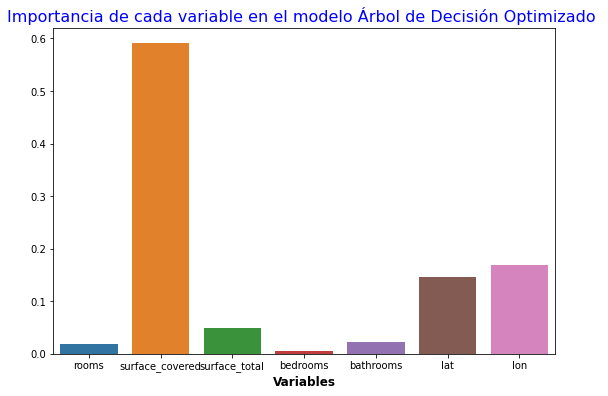

In [84]:
importances_tree = tree_model2.feature_importances_
columns = X.columns

plt.figure(figsize = (9, 6))
sns.barplot(x = columns, y = importances_tree) 
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo Árbol de Decisión Optimizado ", fontsize = 16, color = "blue")
plt.show()

# Vamos a probar usando solo las superficies , lat y long

In [85]:
ab=["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", 'lat', 'lon', "price"]
dfML3 =dfML[ab]
dfML3 = dfML3.dropna()
dfML3.shape

(76771, 8)

In [86]:
X = dfML3[['surface_covered',"surface_total", 'lat', 'lon']]
y = dfML3["price"]

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(53739, 4) (53739,) (23032, 4) (23032,)


Raíz del error cuadrático medio en Train: 80049.47995697078
Raíz del error cuadrático medio en Test: 99833.42939382666


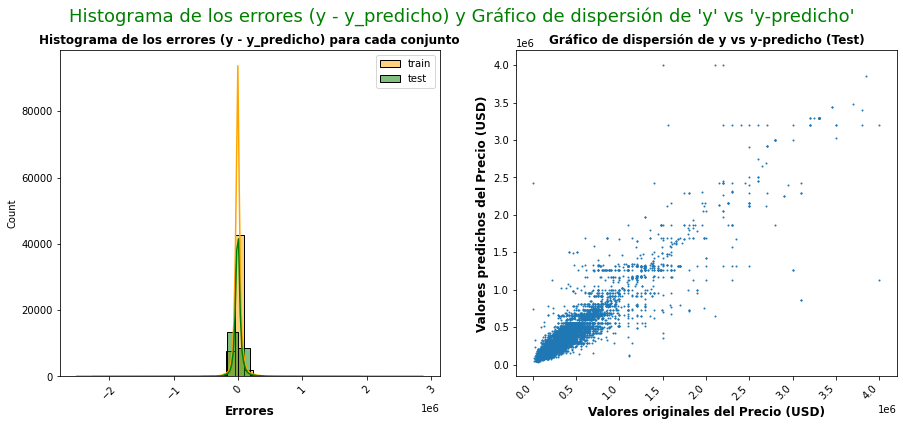

In [88]:
tree_model3 = DecisionTreeRegressor(max_depth = 10)
Eval_mod(X_train, X_test, y_train, y_test, tree_model3)

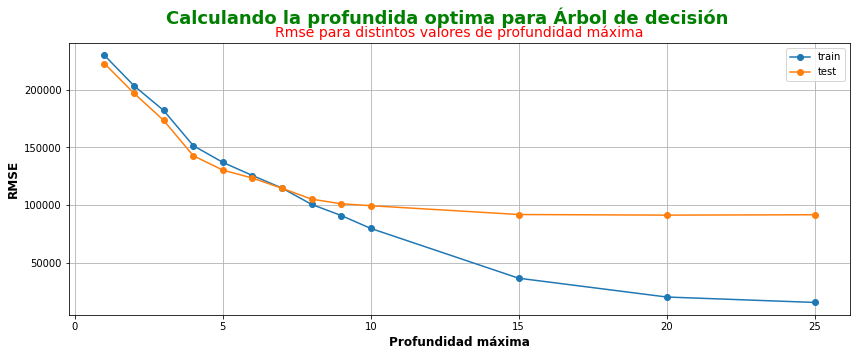

In [89]:
lista_r2_train = []
lista_r2_test = []

lista_rmse_train = []
lista_rmse_test = []

max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25]

for i in max_depths:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test) 
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
   

    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)



plt.figure(figsize = (14,5))
plt.suptitle('Calculando la profundida optima para Árbol de decisión', fontsize = 18, color = "green",  fontweight = "black")

 
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 14, color = "r")


plt.show()

-------------
# **Conclusion**

-Vemos que el mejor predictor para el problema planteado es el Arbol de decision con una profundidad de 10

-Las variables usadas son "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", 'lat', 'lon', "price". Dieron el mejor resultado con RSME de 97000
Se probo tambien usando las variables de Superficie Latitud y Longitud solamente, observando un pero RSME (99800)
